In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
train=pd.read_csv('train.csv')

In [4]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [6]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


EDA

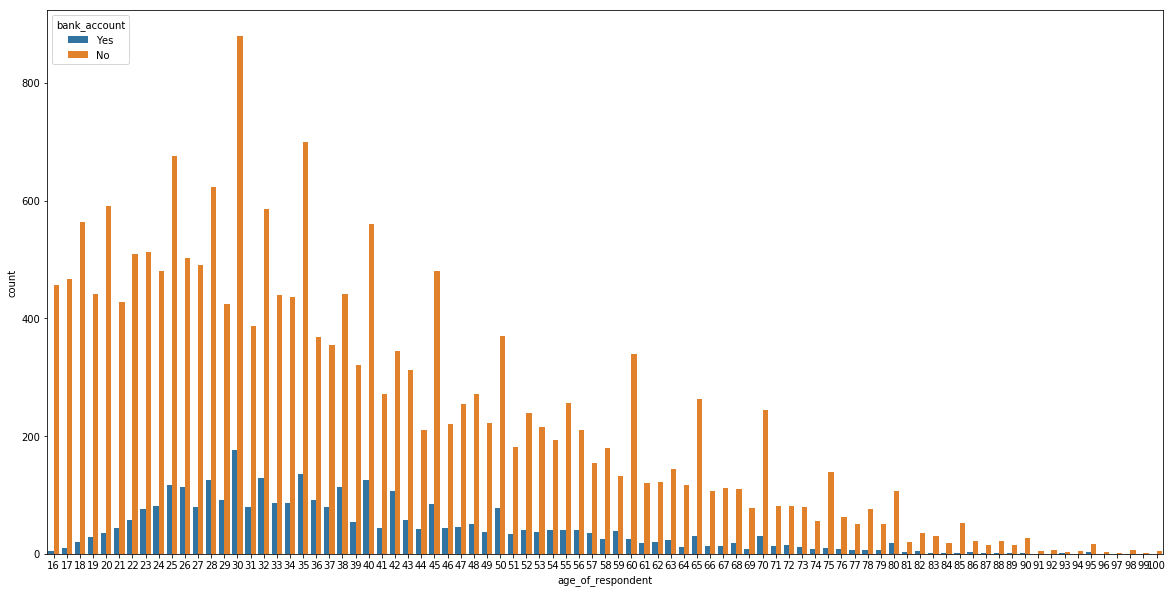

In [7]:
fig,ax=plt.subplots(figsize=(20,10))
sns.countplot(ax=ax,x='age_of_respondent',hue='bank_account',data=train)

Above it is evident that the modal age for those that have and not have bank account is 30. 

In [8]:
train.groupby('bank_account').mean()

,year,household_size,age_of_respondent
bank_account,,,
No,2016.937413,3.823026,38.675292
Yes,2017.211051,3.641606,39.598128


In [9]:
train['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

Those without account(20212) are more than those with account(3312)

In [10]:
train['relationship_with_head'].value_counts()

Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: relationship_with_head, dtype: int64

In [11]:
train['marital_status'].value_counts()

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

In [12]:
train['education_level'].value_counts()

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

In [13]:
train['job_type'].value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

In [14]:
train['bank_account']=train['bank_account'].map({'Yes':1,'No':0})

In [15]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [16]:
train['country'].value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

In [17]:
pd.crosstab(train['country'],train['bank_account'])

bank_account,0,1
country,,
Kenya,4547,1521
Rwanda,7732,1003
Tanzania,6013,607
Uganda,1920,181


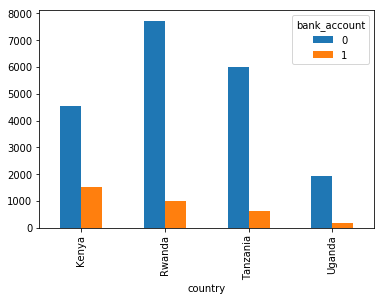

In [18]:
pd.crosstab(train['country'],train['bank_account']).plot(kind='bar')

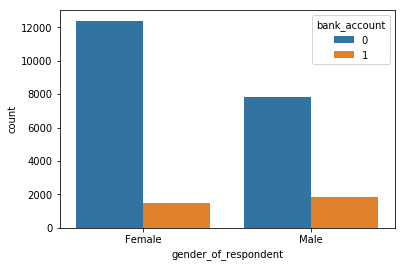

In [19]:
sns.countplot(x='gender_of_respondent',hue='bank_account',data=train)
#There are more females than males
# more males have bank account

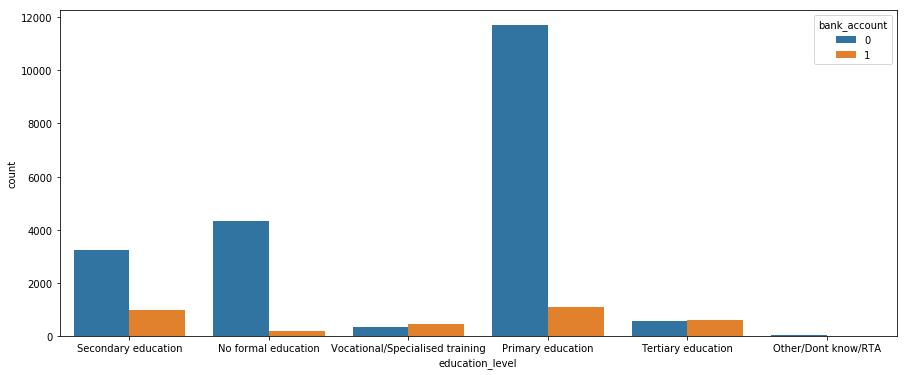

In [20]:
fig,ax=plt.subplots(figsize=(15,6))
sns.countplot(x='education_level',hue='bank_account',data=train,ax=ax)
# primary education is more with low frequency of having bank account
#tertiary education,sec education have a reasonable distribution i.e ratio of bank account to no bank account is raesonable

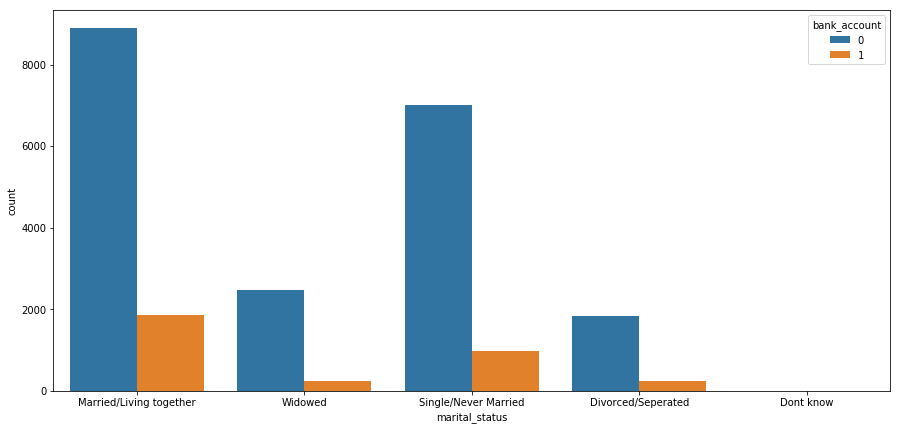

In [21]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(x='marital_status',hue='bank_account',data=train,ax=ax)
#married is highly poor towards having bank account
#

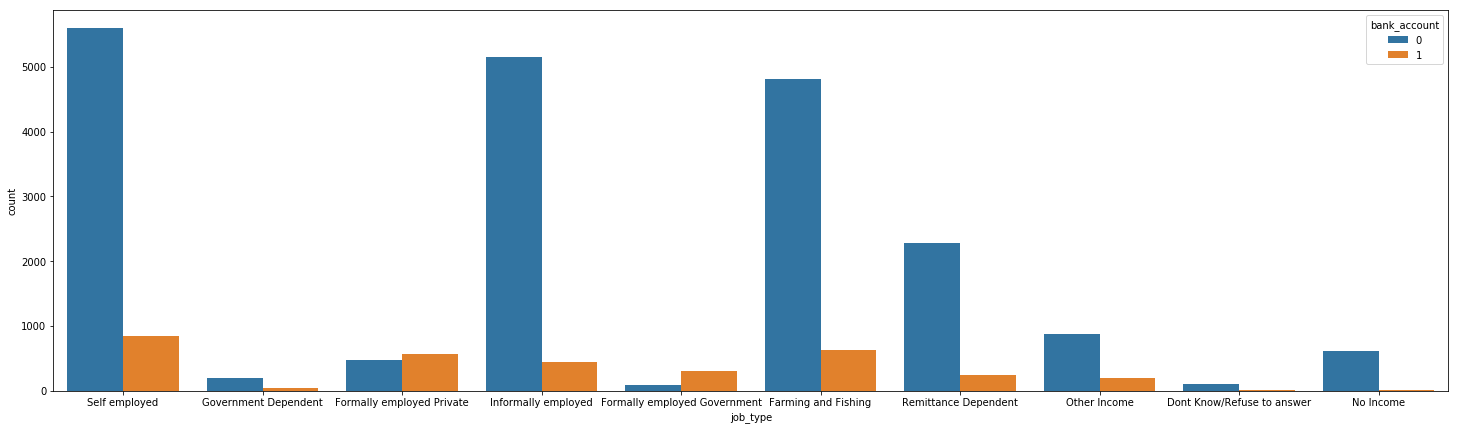

In [22]:
fig,ax=plt.subplots(figsize=(25,7))
sns.countplot(x='job_type',hue='bank_account',data=train,ax=ax)

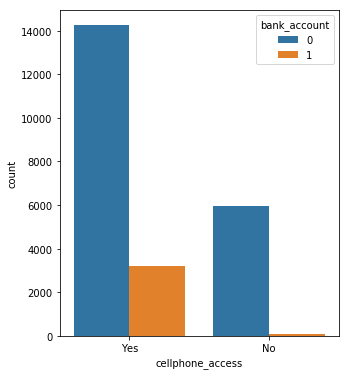

In [23]:
fig,ax=plt.subplots(figsize=(5,6))
sns.countplot(x='cellphone_access',hue='bank_account',data=train,ax=ax)

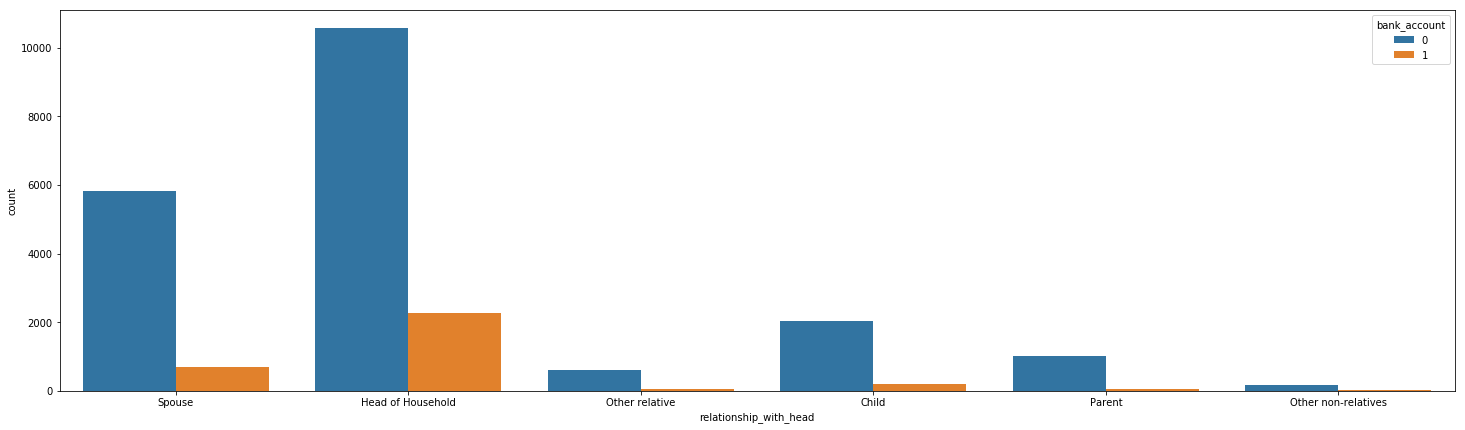

In [24]:
fig,ax=plt.subplots(figsize=(25,7))
sns.countplot(x='relationship_with_head',hue='bank_account',data=train,ax=ax)

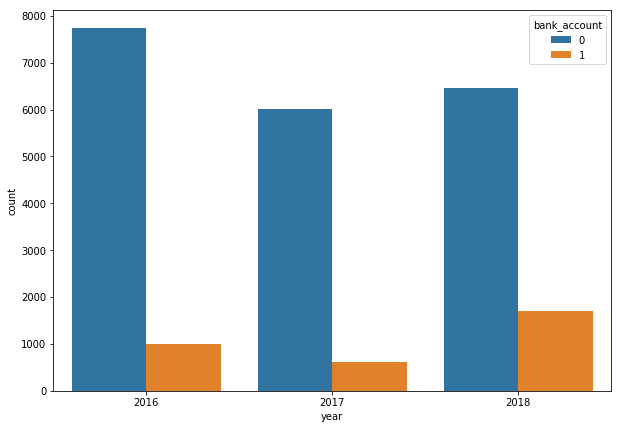

In [25]:
fig,ax=plt.subplots(figsize=(10,7))
sns.countplot(x='year',hue='bank_account',data=train,ax=ax)

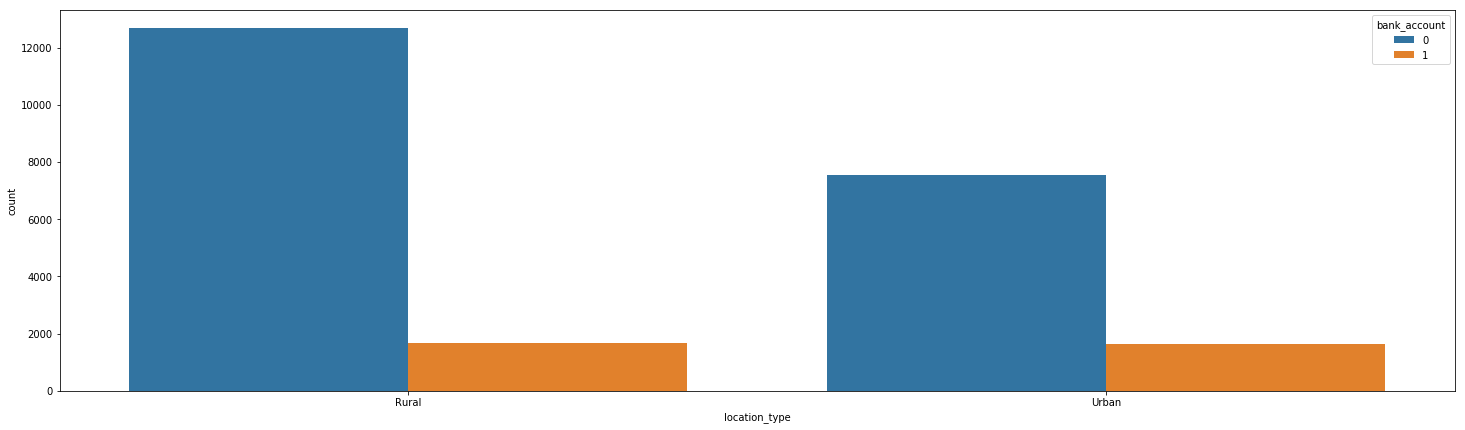

In [26]:
fig,ax=plt.subplots(figsize=(25,7))
sns.countplot(x='location_type',hue='bank_account',data=train,ax=ax)

In [27]:
train.corr()

,year,bank_account,household_size,age_of_respondent
year,1.000000,0.112318,-0.052264,-0.019330
bank_account,0.112318,1.000000,-0.028326,0.019429
household_size,-0.052264,-0.028326,1.000000,-0.129729
age_of_respondent,-0.019330,0.019429,-0.129729,1.000000


train['household_size'].value_counts()

In [28]:
train['household_size'].mean()

3.797483421186873

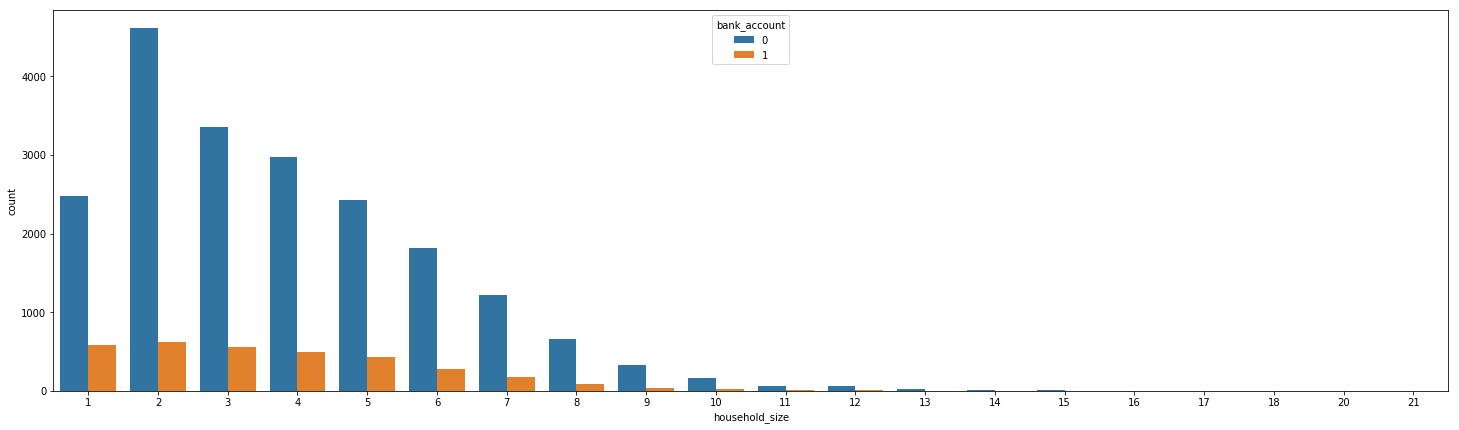

In [29]:
fig,ax=plt.subplots(figsize=(25,7))
sns.countplot(x='household_size',hue='bank_account',data=train,ax=ax)

In [30]:
train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [31]:
train['cellphone_access']=train['cellphone_access'].map({'Yes':1,'No':0})

In [32]:
train['location_type']=train['location_type'].map({'Urban':1,'Rural':0})
train['gender_of_respondent']=train['gender_of_respondent'].map({'Male':1,'Female':0})



In [33]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,Child,Single/Never Married,Primary education,Informally employed


In [34]:
train=pd.get_dummies(train,columns=['country'],prefix_sep='_')

In [35]:
train.head()

,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,uniqueid_1,1,0,1,3,24,0,Spouse,Married/Living together,Secondary education,Self employed,1,0,0,0
1,2018,uniqueid_2,0,0,0,5,70,0,Head of Household,Widowed,No formal education,Government Dependent,1,0,0,0
2,2018,uniqueid_3,1,1,1,5,26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1,0,0,0
3,2018,uniqueid_4,0,0,1,5,34,0,Head of Household,Married/Living together,Primary education,Formally employed Private,1,0,0,0
4,2018,uniqueid_5,0,1,0,8,26,1,Child,Single/Never Married,Primary education,Informally employed,1,0,0,0


In [36]:
train=pd.get_dummies(train,columns=['relationship_with_head'],prefix_sep='_')

In [37]:
train.head()

,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,marital_status,education_level,...,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse
0,2018,uniqueid_1,1,0,1,3,24,0,Married/Living together,Secondary education,...,1,0,0,0,0,0,0,0,0,1
1,2018,uniqueid_2,0,0,0,5,70,0,Widowed,No formal education,...,1,0,0,0,0,1,0,0,0,0
2,2018,uniqueid_3,1,1,1,5,26,1,Single/Never Married,Vocational/Specialised training,...,1,0,0,0,0,0,0,1,0,0
3,2018,uniqueid_4,0,0,1,5,34,0,Married/Living together,Primary education,...,1,0,0,0,0,1,0,0,0,0
4,2018,uniqueid_5,0,1,0,8,26,1,Single/Never Married,Primary education,...,1,0,0,0,1,0,0,0,0,0


In [38]:
train=pd.get_dummies(train,columns=['marital_status'],prefix_sep='_')

In [39]:
train['job_type'].value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

In [40]:
job_count=train.groupby('job_type').size()

In [41]:
len(train)

23524

In [42]:
job_freq=job_count/len(train)
job_freq

job_type
Dont Know/Refuse to answer      0.005356
Farming and Fishing             0.231296
Formally employed Government    0.016451
Formally employed Private       0.044848
Government Dependent            0.010500
Informally employed             0.237927
No Income                       0.026654
Other Income                    0.045911
Remittance Dependent            0.107422
Self employed                   0.273635
dtype: float64

In [43]:
train['job_frequency']=train['job_type'].map(job_freq)

In [44]:
unique_counts=train['uniqueid'].value_counts()

In [45]:
train['unique_count']=train['uniqueid'].map(unique_counts)

In [46]:
train.head(5)

,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level,job_type,...,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,job_frequency,unique_count
0,2018,uniqueid_1,1,0,1,3,24,0,Secondary education,Self employed,...,0,0,1,0,0,1,0,0,0.273635,4
1,2018,uniqueid_2,0,0,0,5,70,0,No formal education,Government Dependent,...,0,0,0,0,0,0,0,1,0.010500,4
2,2018,uniqueid_3,1,1,1,5,26,1,Vocational/Specialised training,Self employed,...,1,0,0,0,0,0,1,0,0.273635,4
3,2018,uniqueid_4,0,0,1,5,34,0,Primary education,Formally employed Private,...,0,0,0,0,0,1,0,0,0.044848,4
4,2018,uniqueid_5,0,1,0,8,26,1,Primary education,Informally employed,...,0,0,0,0,0,0,1,0,0.237927,4


In [47]:
train['education_level'].value_counts()

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

In [48]:
train['education_level']=train['education_level'].map({'No formal education': 0,'Other/Dont know/RTA': 1,'Vocational/Specialised training':2,'Primary education':3,'Secondary education':4,'Tertiary education':5})

In [49]:
train.head()

,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level,job_type,...,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,job_frequency,unique_count
0,2018,uniqueid_1,1,0,1,3,24,0,4,Self employed,...,0,0,1,0,0,1,0,0,0.273635,4
1,2018,uniqueid_2,0,0,0,5,70,0,0,Government Dependent,...,0,0,0,0,0,0,0,1,0.010500,4
2,2018,uniqueid_3,1,1,1,5,26,1,2,Self employed,...,1,0,0,0,0,0,1,0,0.273635,4
3,2018,uniqueid_4,0,0,1,5,34,0,3,Formally employed Private,...,0,0,0,0,0,1,0,0,0.044848,4
4,2018,uniqueid_5,0,1,0,8,26,1,3,Informally employed,...,0,0,0,0,0,0,1,0,0.237927,4


In [50]:
train.drop(['uniqueid','job_type'],axis=1,inplace=True)

In [51]:
train.head()

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level,country_Kenya,country_Rwanda,...,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,job_frequency,unique_count
0,2018,1,0,1,3,24,0,4,1,0,...,0,0,1,0,0,1,0,0,0.273635,4
1,2018,0,0,0,5,70,0,0,1,0,...,0,0,0,0,0,0,0,1,0.010500,4
2,2018,1,1,1,5,26,1,2,1,0,...,1,0,0,0,0,0,1,0,0.273635,4
3,2018,0,0,1,5,34,0,3,1,0,...,0,0,0,0,0,1,0,0,0.044848,4
4,2018,0,1,0,8,26,1,3,1,0,...,0,0,0,0,0,0,1,0,0.237927,4


In [52]:
test=pd.read_csv('test.csv')

In [53]:

test['cellphone_access']=test['cellphone_access'].map({'Yes':1,'No':0})
test['location_type']=test['location_type'].map({'Urban':1,'Rural':0})
test['gender_of_respondent']=test['gender_of_respondent'].map({'Male':1,'Female':0})
test=pd.get_dummies(test,columns=['country'],prefix_sep='_')
test=pd.get_dummies(test,columns=['relationship_with_head'],prefix_sep='_')
test=pd.get_dummies(test,columns=['marital_status'],prefix_sep='_')
job_count=test.groupby('job_type').size()
len(test)
job_freq=job_count/len(test)
test['job_frequency']=test['job_type'].map(job_freq)
unique_counts=test['uniqueid'].value_counts()
test['unique_count']=test['uniqueid'].map(unique_counts)

In [54]:
test['education_level']=test['education_level'].map({'No formal education': 0,'Other/Dont know/RTA': 1,'Vocational/Specialised training':2,'Primary education':3,'Secondary education':4,'Tertiary education':5})

In [55]:
test.drop(['uniqueid','job_type'],axis=1,inplace=True)

In [56]:
test.head(5)

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,education_level,country_Kenya,country_Rwanda,country_Tanzania,...,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,job_frequency,unique_count
0,2018,1,1,3,30,1,4,1,0,0,...,0,0,0,0,0,1,0,0,0.016458,1
1,2018,1,1,7,51,1,2,1,0,0,...,0,0,0,0,0,1,0,0,0.044021,1
2,2018,0,0,3,77,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0.109756,1
3,2018,0,0,6,39,0,3,1,0,0,...,0,0,0,0,0,1,0,0,0.109756,1
4,2018,1,0,3,16,1,4,1,0,0,...,0,0,0,0,0,0,1,0,0.109756,1


In [57]:
X=train.drop('bank_account',axis=1)

In [58]:
y=train['bank_account']

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [60]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((15761, 24), (15761,), (7763, 24), (7763,))

In [62]:
rfc=RandomForestClassifier(n_estimators=200,criterion='entropy',min_samples_split=3)

In [63]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
rfc_pred=rfc.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('error_rate:',1-(accuracy_score(y_test,rfc_pred)))
print('accuracy:',accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

error_rate: 0.1243076130361973
accuracy: 0.8756923869638027
[[6417  261]
 [ 704  381]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6678
           1       0.59      0.35      0.44      1085

   micro avg       0.88      0.88      0.88      7763
   macro avg       0.75      0.66      0.69      7763
weighted avg       0.86      0.88      0.86      7763



In [66]:
prediction=rfc.predict(test)
test_data=pd.read_csv('test.csv')

In [67]:
# crete submission DataFrame
submission = pd.DataFrame({"uniqueid": test_data["uniqueid"] + " x " + test_data["country"],

"bank_account": prediction})
submission.to_csv('submission.csv', index = False)

In [70]:
'''
from xgboost import XGBClassifier
xgb_data=xgb.DMatrix(data=X,label=y)'''
from xgboost import XGBClassifier

In [71]:
xgbc=XGBClassifier(max_depth=5,learing_rate=0.5,n_estimators=200,objective='binary:logistic',gamma=0.1,booster='gbtree',colsample_bytree=0.3,subsample=0.8
                      )

In [72]:
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
       learing_rate=0.5, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1)

In [73]:
pred=xgbc.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc=accuracy_score(y_test,pred)
print('error_rate:',1-(accuracy_score(y_test,pred)))
print('accuracy:',acc)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
'''



error_rate: 0.10949375241530335
accuracy: 0.8905062475846967
[[6510  168]
 [ 682  403]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6678
           1       0.71      0.37      0.49      1085

   micro avg       0.89      0.89      0.89      7763
   macro avg       0.81      0.67      0.71      7763
weighted avg       0.88      0.89      0.88      7763



'\n\nparams = {"objective":"binary:logistic",\'colsample_bytree\': 0.3,\'learning_rate\': 0.5\n          ,\n                \'max_depth\': 5, \'alpha\': 10}\n\ncv_results = xgb.cv(dtrain=xgb_data, params=params, nfold=10,stratified=True,\n                    num_boost_round=150,early_stopping_rounds=10,metrics=\'error\', as_pandas=True, seed=110)\nprint(cv_results.tail())\n                    '

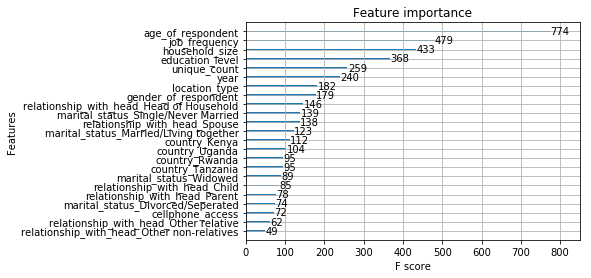

In [75]:
predxgb=xgbc.predict(test)
from xgboost import plot_importance
plot_importance(xgbc)

In [76]:
train.columns

Index(['year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'education_level', 'country_Kenya', 'country_Rwanda',
       'country_Tanzania', 'country_Uganda', 'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'job_frequency', 'unique_count'],
      dtype='object')

In [89]:
n_X=train[['year', 'location_type', 'cellphone_access', 'household_size', 'age_of_respondent', 'gender_of_respondent', 'education_level', 'job_frequency']
]


In [90]:
nX_train, nX_test, y_train, y_test = train_test_split(n_X, y, test_size=0.3, random_state=110)

In [139]:
n_xgbc=XGBClassifier(min_child_weight=3,gamma=0,subsample=0.8,max_depth=3,n_estimators=300,learning_rate=0.3,colsample_bytree=0.8)

In [140]:
n_xgbc.fit(nX_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       learning_rate=0.3, max_delta_step=0, max_depth=3,
       min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.8, verbosity=1)

In [141]:
n_pred=n_xgbc.predict(nX_test)

In [142]:

print('error_rate:',1-(accuracy_score(y_test,n_pred)))
print('accuracy:',accuracy_score(y_test,n_pred))

print(confusion_matrix(y_test,n_pred))
print(classification_report(y_test,n_pred))

error_rate: 0.10952111079625959
accuracy: 0.8904788892037404
[[5900  176]
 [ 597  385]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6076
           1       0.69      0.39      0.50       982

   micro avg       0.89      0.89      0.89      7058
   macro avg       0.80      0.68      0.72      7058
weighted avg       0.88      0.89      0.88      7058



In [1]:
from sklearn.model_selection import StratifiedKFold

i=1
kf = StratifiedKFold(n_splits=6,random_state=5,shuffle=True)
for train_index,test_index in kf.split(n_X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = n_X.loc[train_index],n_X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    n_xgbc.fit(xtr, ytr)
    npred=n_xgbc.predict(xvl)
    print('error_rate:',1-(accuracy_score(yvl,npred)))
    print(confusion_matrix(yvl,npred))
    print(classification_report(yvl,npred))

    i+=1
       


Help on class StratifiedKFold in module sklearn.model_selection._split:

class StratifiedKFold(_BaseKFold)
 |  StratifiedKFold(n_splits=5, shuffle=False, random_state=None)
 |  
 |  Stratified K-Folds cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets.
 |  
 |  This cross-validation object is a variation of KFold that returns
 |  stratified folds. The folds are made by preserving the percentage of
 |  samples for each class.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=5
 |      Number of folds. Must be at least 2.
 |  
 |      .. versionchanged:: 0.22
 |          ``n_splits`` default value changed from 3 to 5.
 |  
 |  shuffle : boolean, optional
 |      Whether to shuffle each class's samples before splitting into batches.
 |  
 |  random_state : int, RandomState instance or None, optional, default=None
 |      If int, random_state is the seed used by the random number

In [143]:
npredxgb=n_xgbc.predict(test)
submission = pd.DataFrame({"uniqueid": test_data["uniqueid"] + " x " + test_data["country"],

"bank_account": npredxgb})
submission.to_csv('submission.csv', index = False)

CROSS VALIDATION 

In [ ]:
#Plot correlations, run statistical tests such as chisquare, use RFE.